## Summary of Machine Learning 

### Chapter 1: Data Loading, Inspection & Visualization

In [43]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (20,3)

**Basics of Pandas**
* To read a file: `df = pd.read_csv('path/to/csv')`
* To see the first elements `df.head(5)`
* Summary of data: `df.info()` and statistics of data `df.describe()` (count,mean, std, min, max)
* Rows and columns: `df.shape`, Rows: `df.shape[0]`and Columns/Features: `df.shape[1]`
* See all the columns: `df.columns` (List of all the columns names)
* See the types of features: `df.dtypes`
* Get the number of appearences per feature: `df["BOROUGH"].value_counts()`

**Select Specific Columns or Specific Rows**
* Selecting columns: `cols = ["CRASH DATE", "BOROUGH", "NUMBER OF PERSONS INJURED"], df[cols]`
* Selecting rows: `df[0:5]`

**Select rows & columns**
We use `loc` if we have the names of the columns otherwise we use `iloc`
* Selecting rows & columns: `df.loc[0:5, ["CRASH DATE", "BOROUGH", "NUMBER OF PERSONS INJURED"]]`
* Select rows & columns `df.iloc[[1,4], 0:3]` 
* Changing the value: `df.loc[0, "BOROUGH"] = "BROOKLY"`

**Boolean indexing**
* `boolean_condition = (df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)`
    * `df_filtered = df[boolean_condition]`

**Agreggation**
* Sum up the number of all injured persons *per borough* for all different boroughs
    * `df.groupby("BOROUGH", as_index=False)["NUMBER OF PERSONS INJURED"].sum()`
* Apply multiple aggregation functions (here "sum" and "max")
    * `df.groupby("BOROUGH", as_index=False)["NUMBER OF PERSONS INJURED"].agg({"SUM INJURED": "sum", "MAX INJURED": "max"})`

**Plotting**
bar is horizontal barh is vertical:
* Histogram: `df["NUMBER OF PERSONS INJURED"].hist()`
* with more bins: `df["NUMBER OF PERSONS INJURED"].hist(bins=50)`
* `df["BOROUGH"].value_counts().plot(kind='bar')`

In [44]:
df = pd.read_csv("./data/nba_stats.csv")
df.head(5)

Year        Player Pos  Age   Tm    MP  FT  TRB  AST  STL  BLK  TOV   PF   
0  2017   Ivica Zubac   C   19  LAL   609  32  159   30   14   33   30   66  \
1  2017  Gerald Green  SF   31  BOS   538  33   85   33    9    7   25   48   
2  2017   Danny Green  SG   29  SAS  1807  27  224  124   71   58   76  120   
3  2017  Jerian Grant  PG   24  CHI  1028  65  111  120   47    8   44   93   
4  2017  Jerami Grant  SF   22  OKC  1490  86  199   46   33   75   41  144   

   PTS  
0  284  
1  262  
2  497  
3  370  
4  421

In [45]:
# Find the average age of the players for the year 2017.
bool_cond = (df.Year == 2017)
df[bool_cond].Age.mean()

26.40672268907563

<Axes: ylabel='Year'>

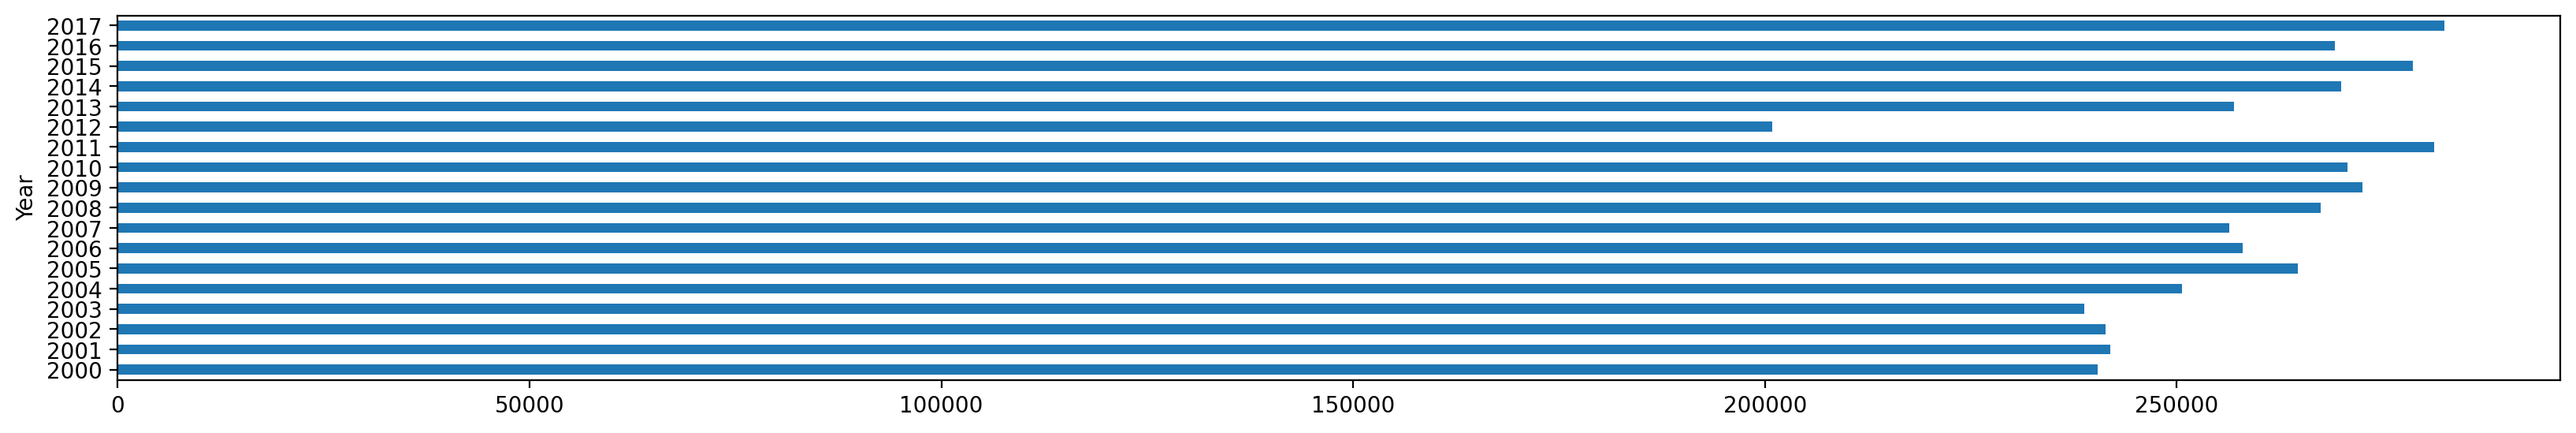

In [46]:
#Plot the total number of points (`PTS`) per year since 2000:
bool_cond = (df.Year >= 2000)
df1 = df[bool_cond].groupby("Year")["PTS"].sum().plot(kind="barh")
df1

<Axes: xlabel='Year'>

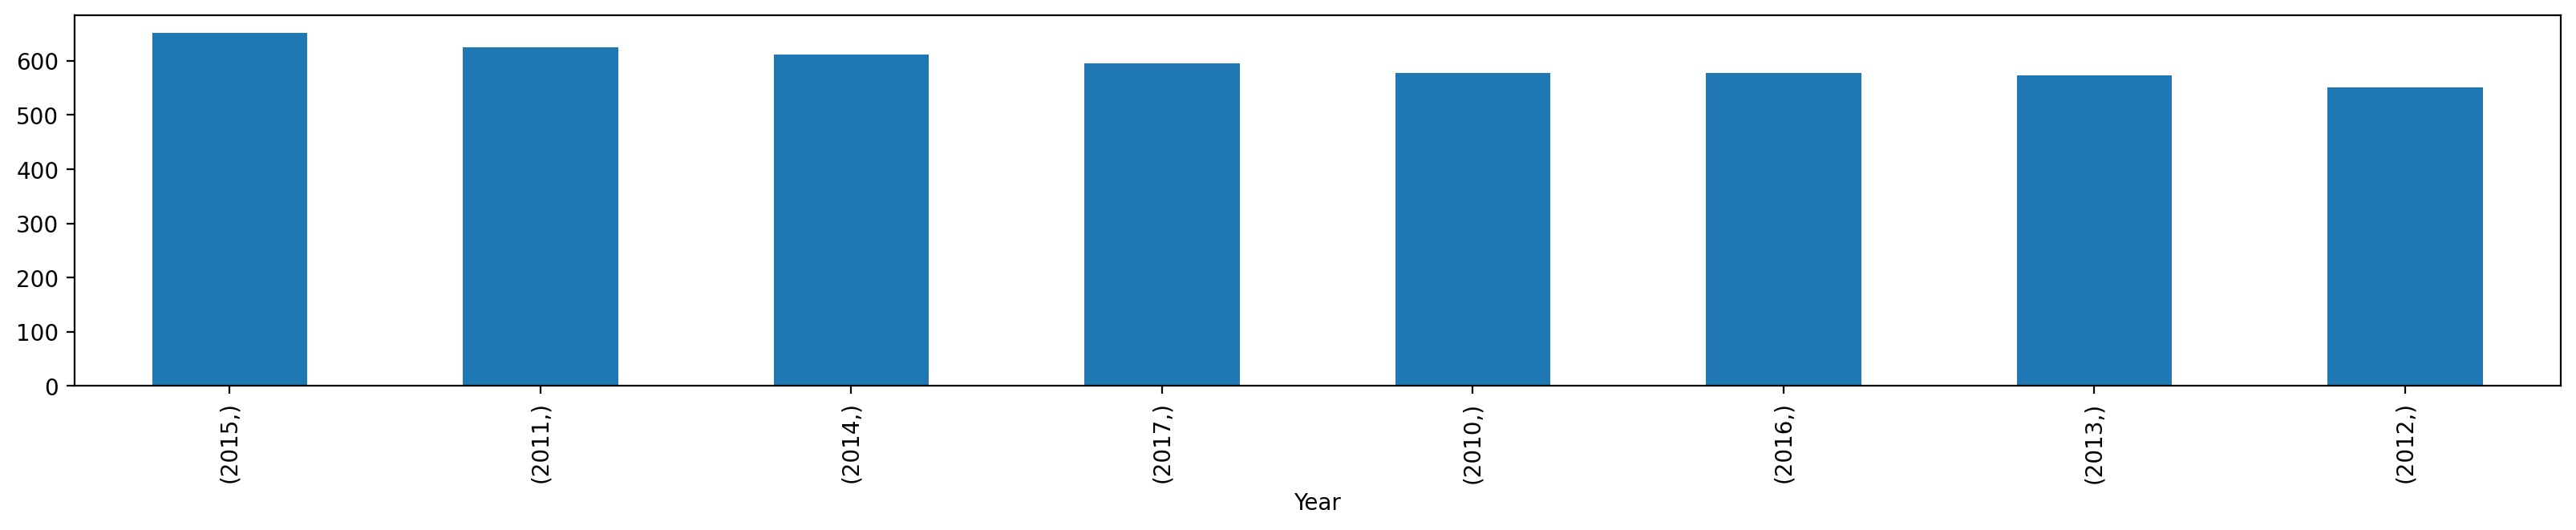

In [47]:
# Plot the number of players per year since 2010. What is the year with the most players?
bool_cond = (df.Year >= 2010)
df1 = df.loc[bool_cond, ["Year"]]
df1.value_counts(sort=True).plot(kind="bar")